In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity

# Базовая работа с изображением

In [2]:
image = cv2.imread('sar_2_color.jpg')

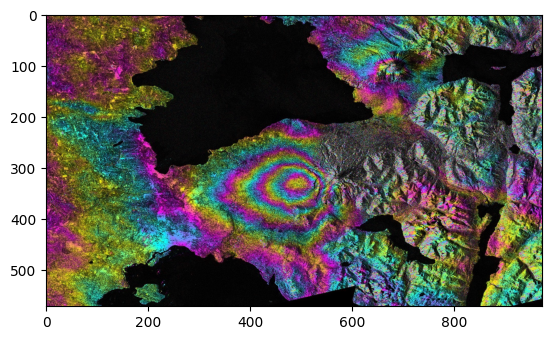

In [3]:
plt.imshow(image)

In [4]:
image.shape # h,w,c

(572, 974, 3)

In [5]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [6]:
# ROI
img_roi = image[100:200, 500:700]

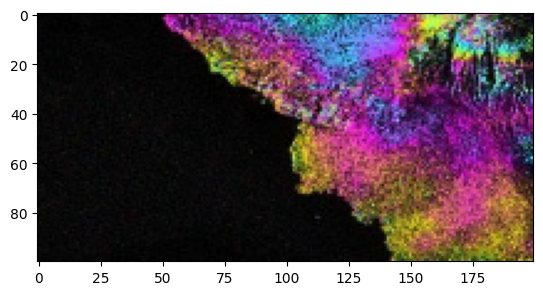

In [7]:
plt.imshow(img_roi)

In [8]:
b,g,r = cv2.split(image)

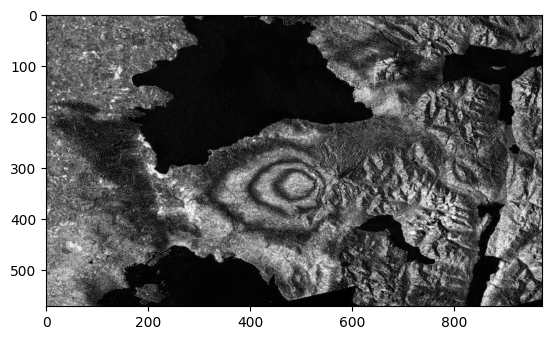

In [9]:
plt.imshow(b, cmap = 'gray')

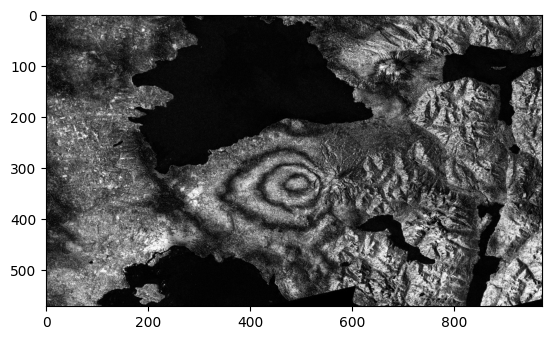

In [10]:
plt.imshow(g, cmap = 'gray')

In [11]:
# alternative approach
b = image[:,:,0]

In [12]:
import copy

image2 = copy.deepcopy(image)

In [13]:
image2[50:100,50:100] = [0,0,0]

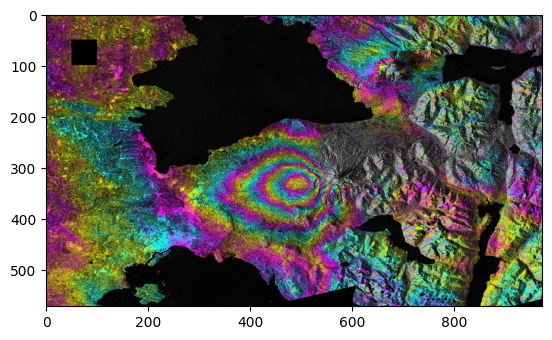

In [14]:
plt.imshow(image2)

In [15]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

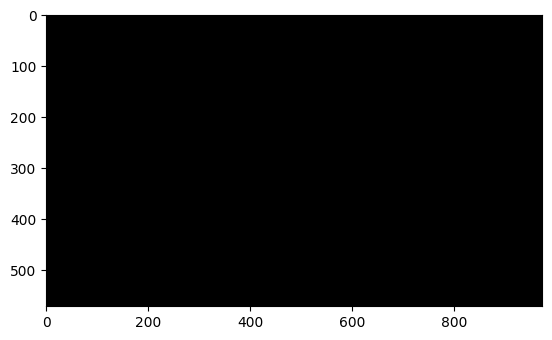

In [16]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [17]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [18]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [19]:
image_gray[0,0]

np.uint8(40)

In [20]:
image_gray.shape

(572, 974)

In [21]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [22]:
image_hsv.shape

(572, 974, 3)

In [23]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [24]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [25]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [26]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [27]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

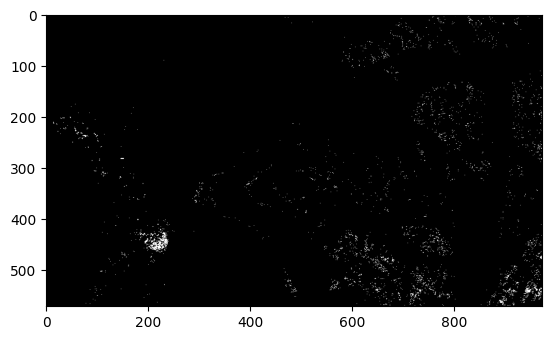

In [28]:
plt.imshow(thresh1, cmap='gray')

In [29]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [30]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

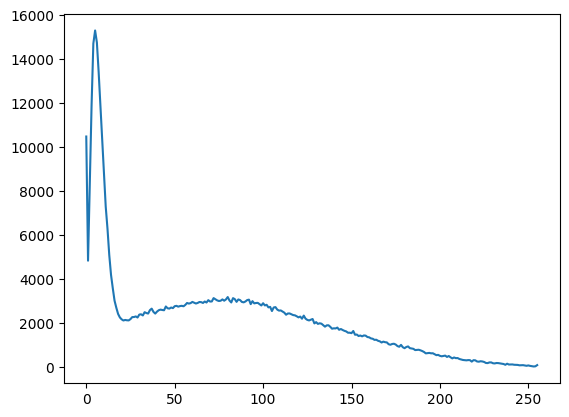

In [31]:
plt.plot(b_hist)

In [32]:
b_hist_cum = b_hist.cumsum()

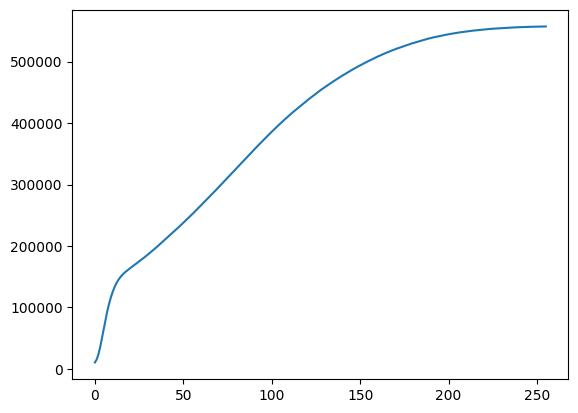

In [33]:
plt.plot(b_hist_cum)

In [34]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

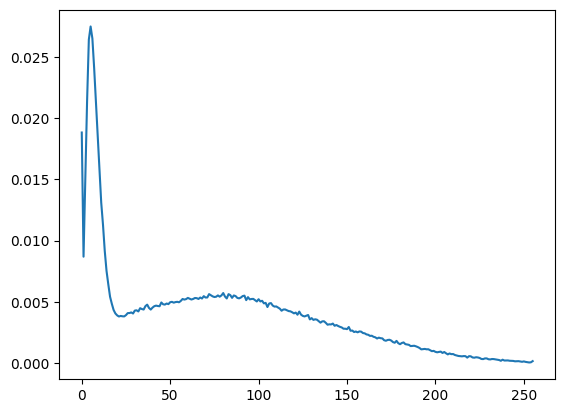

In [35]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [36]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


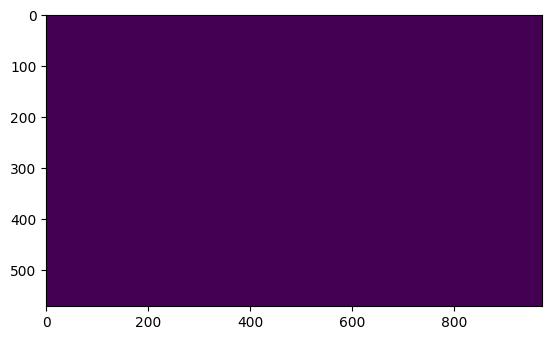

In [37]:
plt.imshow(diff)

In [38]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [39]:
mean = image_gray.mean()

In [40]:
std = image_gray.std()

In [41]:
print(mean,std)

67.41225535245043 52.016191875959635


In [42]:
eq_gray = cv2.equalizeHist(image_gray)

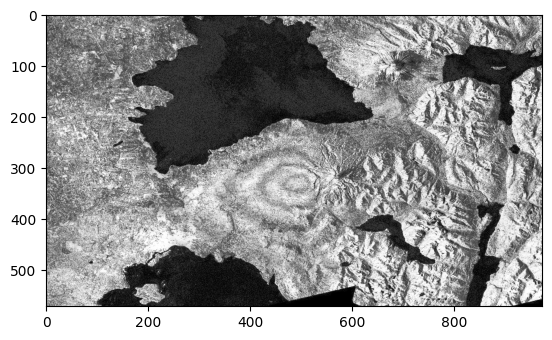

In [43]:
plt.imshow(eq_gray, cmap="gray")


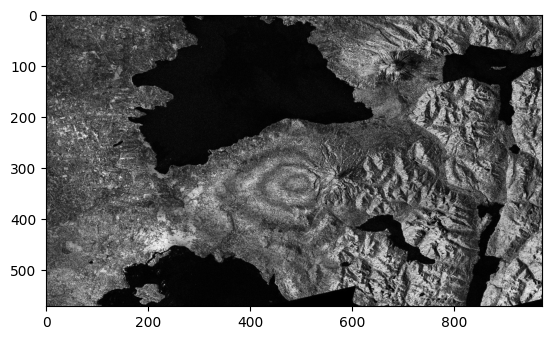

In [44]:
plt.imshow(image_gray, cmap="gray")

In [45]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


In [87]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 

In [88]:
image = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)

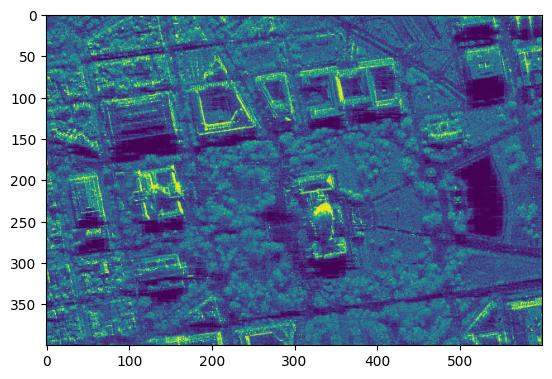

In [89]:
plt.imshow(image)

In [90]:
# 2. постройте гистограмму

In [91]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

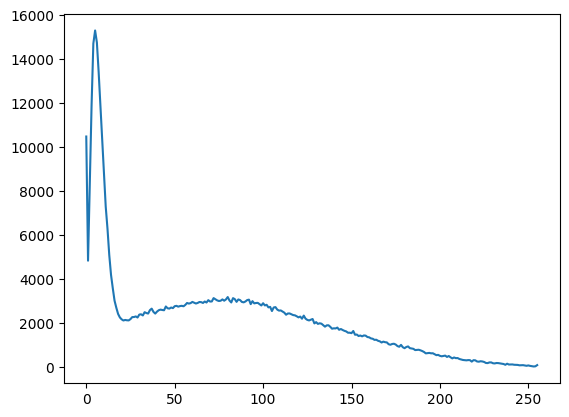

In [92]:
plt.plot(b_hist)

In [93]:
b_hist_cum = b_hist.cumsum()

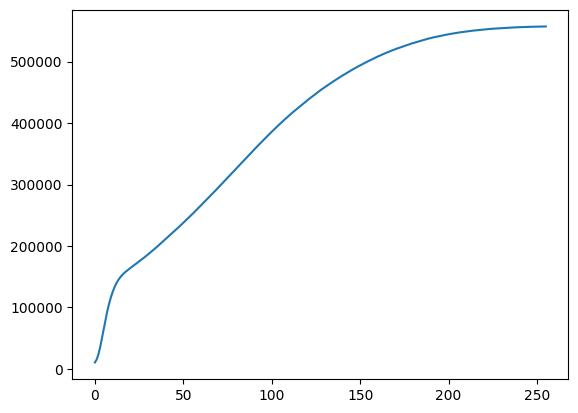

In [94]:
plt.plot(b_hist_cum)

In [95]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

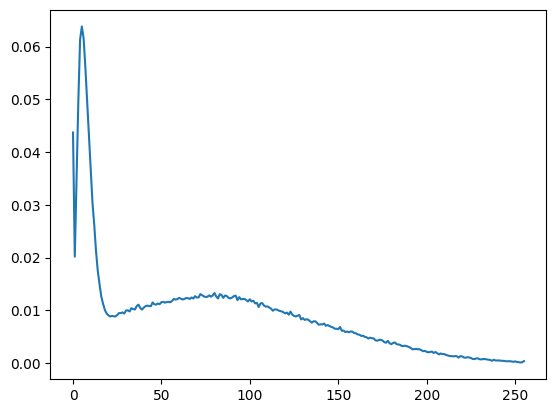

In [96]:
plt.plot(b_hist_norm)

In [97]:
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

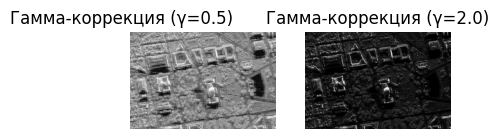

In [98]:
def gamma_correction(image, gamma):
    # Нормализуем изображение к диапазону [0, 1]
    normalized = image / 255.0
    # Применяем гамма-коррекцию
    corrected = np.power(normalized, gamma)
    # Возвращаем к диапазону [0, 255]
    return np.uint8(corrected * 255)

# Гамма < 1 (осветление)
gamma_low = 0.5
gamma_corrected_low = gamma_correction(image, gamma_low)

# Гамма > 1 (затемнение)
gamma_high = 2.0
gamma_corrected_high = gamma_correction(image, gamma_high)

# Отображение результатов гамма-коррекции
plt.subplot(2, 3, 2)
plt.imshow(gamma_corrected_low, cmap='gray')
plt.title(f'Гамма-коррекция (γ={gamma_low})                               ')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gamma_corrected_high, cmap='gray')
plt.title(f'Гамма-коррекция (γ={gamma_high})')
plt.axis('off')

In [99]:
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [100]:
mse_low = mean_squared_error(image, gamma_corrected_low)
ssim_low = structural_similarity(image, gamma_corrected_low, win_size=3)

# MSE и SSIM для gamma > 1
mse_high = mean_squared_error(image, gamma_corrected_high)
ssim_high = structural_similarity(image, gamma_corrected_high, win_size=3)

print("Сравнение с гамма-коррекцией:")
print(f"γ={gamma_low}: MSE = {mse_low:.2f}, SSIM = {ssim_low:.4f}")
print(f"γ={gamma_high}: MSE = {mse_high:.2f}, SSIM = {ssim_high:.4f}")

Сравнение с гамма-коррекцией:
γ=0.5: MSE = 3250.43, SSIM = 0.7734
γ=2.0: MSE = 2383.76, SSIM = 0.5005


In [101]:
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray

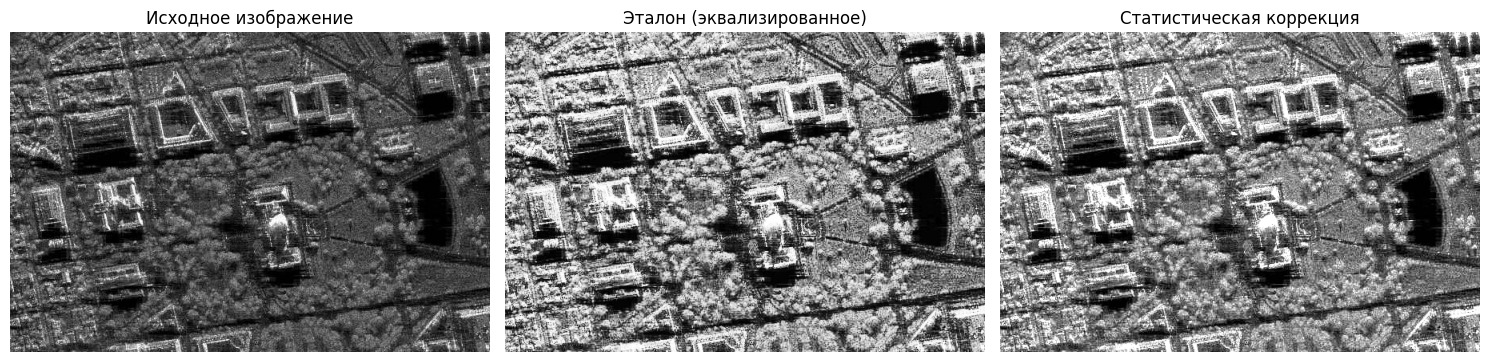


Статистическая коррекция: MSE = 2946.70, SSIM = 0.7862


In [102]:
def statistical_color_correction(source, target):
    """
    Статистическая цветокоррекция на основе статистики целевого изображения
    """
    # Вычисляем среднее и стандартное отклонение для исходного и целевого изображений
    source_mean = np.mean(source)
    source_std = np.std(source)
    
    target_mean = np.mean(target)
    target_std = np.std(target)
    
    # Применяем линейное преобразование
    corrected = (source - source_mean) * (target_std / source_std) + target_mean
    
    # Обрезаем значения до диапазона [0, 255]
    corrected = np.clip(corrected, 0, 255)
    
    return corrected.astype(np.uint8)

# Создаем эталонное изображение с равномерным распределением (гистограммная эквализация)
eq_gray = cv2.equalizeHist(image)

# Применяем статистическую цветокоррекцию
stat_corrected = statistical_color_correction(image, eq_gray)

# Отображение результатов статистической цветокоррекции
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('Эталон (эквализированное)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(stat_corrected, cmap='gray')
plt.title('Статистическая коррекция')
plt.axis('off')

plt.tight_layout()
plt.show()

# Сравнение статистической коррекции
mse_stat = mean_squared_error(image, stat_corrected)
ssim_stat = structural_similarity(image, stat_corrected)

print(f"\nСтатистическая коррекция: MSE = {mse_stat:.2f}, SSIM = {ssim_stat:.4f}")

In [103]:
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

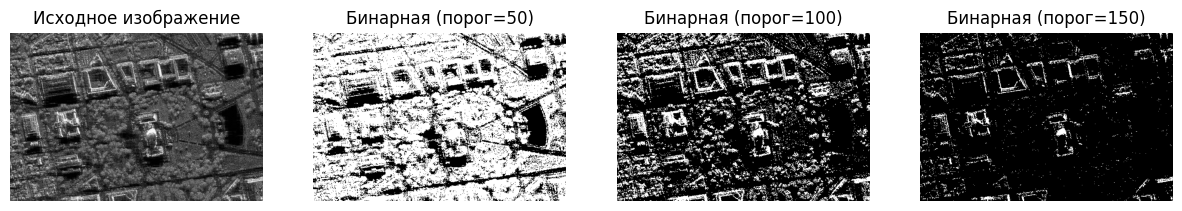

In [104]:
plt.figure(figsize=(15, 10))

# Исходное изображение
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

# 1. Бинарная пороговая фильтрация с разными порогами
_, thresh1 = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
plt.subplot(2, 4, 2)
plt.imshow(thresh1, cmap='gray')
plt.title('Бинарная (порог=50)')
plt.axis('off')

_, thresh2 = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
plt.subplot(2, 4, 3)
plt.imshow(thresh2, cmap='gray')
plt.title('Бинарная (порог=100)')
plt.axis('off')

_, thresh3 = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
plt.subplot(2, 4, 4)
plt.imshow(thresh3, cmap='gray')
plt.title('Бинарная (порог=150)')
plt.axis('off')